In [13]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import os 
import wfdb

## Read Sami Trop Data 

In [3]:
df = pd.read_csv("../data/Sami-Trop.csv")
df.head(10)

,exam_id,age,is_male,normal_ecg,death,timey,nn_predicted_age
0,294669,67,True,False,False,2.116020,51.093110
1,291318,65,True,False,False,3.077345,76.923935
2,247007,67,False,False,False,2.378450,61.212074
3,181629,34,False,False,False,2.676793,56.736490
4,250434,52,False,False,False,2.118782,71.822754
5,253698,67,False,False,False,2.071821,74.282010
6,253958,76,False,True,False,2.071821,87.866250
7,406936,75,False,False,False,2.080108,83.031970
8,250492,69,False,False,False,2.080108,54.031060
9,253803,53,False,True,False,2.071821,58.985962


#### Check Types 

In [4]:
df.dtypes

exam_id               int64
age                   int64
is_male                bool
normal_ecg             bool
death                  bool
timey               float64
nn_predicted_age    float64
dtype: object

In [5]:
df.shape

(1631, 7)

In [6]:
## check for duplicate rows 

duplicate_rows = df[df.duplicated()]
print("Duplicate Shape:", duplicate_rows.shape)

## looks like no duplicate rows 

Duplicate Shape: (0, 7)


In [7]:
## lets get the count and check for missing columns 

df.count()
## all here 

exam_id             1631
age                 1631
is_male             1631
normal_ecg          1631
death               1631
timey               1631
nn_predicted_age    1631
dtype: int64

### Creating simple graphs 

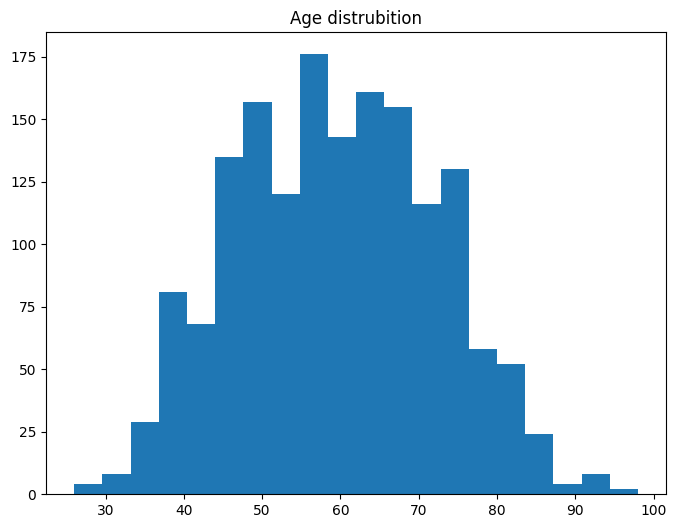

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(df["age"], bins=20)
plt.title("Age distrubition")
plt.show()

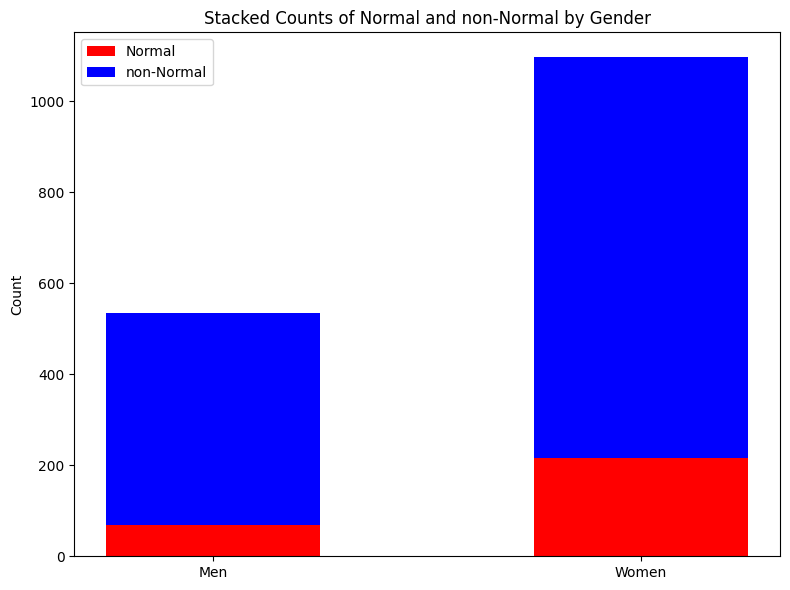

In [9]:
## Men v Woman 

x = np.arange(len(df["is_male"]))
bar_width = 0.5 

grouped = df.groupby(['is_male', 'normal_ecg']).size().unstack(fill_value=0)
for val in [True, False]:
    if val not in grouped.columns:
        grouped[val] = 0

# Prepare data
men_positive = grouped.loc[True, True] if True in grouped.index else 0
men_negative = grouped.loc[True, False] if True in grouped.index else 0
women_positive = grouped.loc[False, True] if False in grouped.index else 0
women_negative = grouped.loc[False, False] if False in grouped.index else 0

labels = ['Men', 'Women']
positives = [men_positive, women_positive]
negatives = [men_negative, women_negative]

x = range(len(labels))
bar_width = 0.5

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(x, positives, bar_width, label='Normal', color='red')
ax.bar(x, negatives, bar_width, bottom=positives, label='non-Normal', color='blue')

# Labeling
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Count')
ax.set_title('Stacked Counts of Normal and non-Normal by Gender')
ax.legend()

plt.tight_layout()
plt.show()

In [10]:
positive_df = df[df['normal_ecg'] == True]
positive_df.shape

(286, 7)

## Lets Read the HDF5 file  

In [ ]:

# # path to the files 
# folder_path = '../data/wfdb_output'

# # Get all .hea files to extract the record names
# record_names = [f[:-4] for f in os.listdir(folder_path) if f.endswith('.hea')]

# # Loop over each record
# for record_name in record_names:
#     record_path = os.path.join(folder_path, record_name )
#     record_path += '.hea'
#     try:
#         # Read the record
#         print(record_path)
#         record = wfdb.rdrecord(record_path)
        
#         print(f"\n✅ Loaded: {record_name}")
#         print(f"  - Sampling frequency: {record.fs}")
#         print(f"  - Signal shape: {record.p_signal.shape}")
#         print(f"  - Channel names: {record.sig_name}")

#         # Quick plot of first 1000 samples of first channel
#         plt.figure(figsize=(10, 2))
#         plt.plot(record.p_signal[:1000, 0])
#         plt.title(f'{record_name} - Channel: {record.sig_name[0]}')
#         plt.xlabel('Sample')
#         plt.ylabel('Amplitude (mV)')
#         plt.tight_layout()
#         plt.show()

#     except Exception as e:
#         print(f"❌ Failed to read {record_name}: {e}")




✅ Loaded: record_1630
  - Sampling frequency: 400
  - Signal shape: (4096, 12)
  - Channel names: ['DI', 'DII', 'DIII', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']


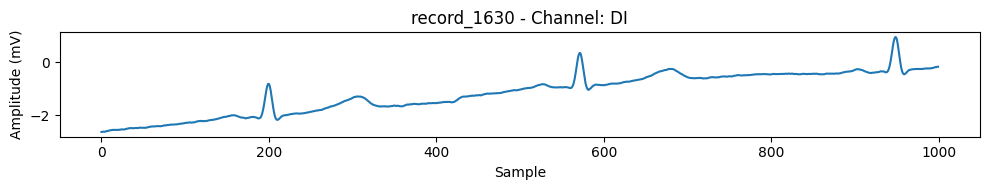

In [26]:
try:
    record = wfdb.rdrecord("../data/wfdb_output/record_0000")
    print(f"\n✅ Loaded: {record_name}")
    print(f"  - Sampling frequency: {record.fs}")
    print(f"  - Signal shape: {record.p_signal.shape}")
    print(f"  - Channel names: {record.sig_name}")

    # Quick plot of first 1000 samples of first channel
    plt.figure(figsize=(10, 2))
    plt.plot(record.p_signal[:1000, 0])
    plt.title(f'{record_name} - Channel: {record.sig_name[0]}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude (mV)')
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"❌ Failed to read {record_name}: {e}")